In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.linalg import lstsq

### 1. Define & Plot Python functions

In [2]:
def exp(x):  # exponential function, supports value or vector
    return np.exp(x)

def coscos(x):  # cos of cos function, supports value or vector
    return np.cos(np.cos(x))

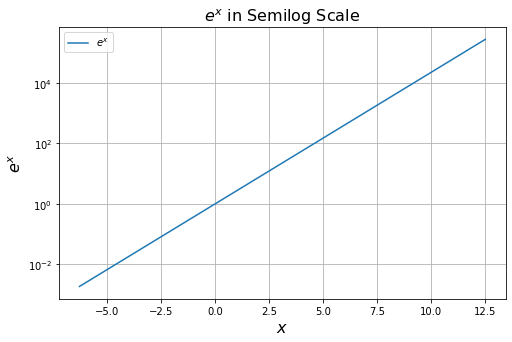

In [3]:
x = np.linspace(-2 * np.pi, 4 * np.pi, 400, endpoint=False)

def plot_exp(title, periodic_extension=False, fourier=False):
    plt.figure(figsize=(8, 5))
    plt.title(title, fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    plt.ylabel("$e^x$", fontsize=16)
    plt.semilogy(x, exp(x), label="$e^x$")
    if periodic_extension or fourier:
        plt.semilogy(x, exp(x % (2 * np.pi)), label="periodic extension")
    if fourier:
        plt.semilogy(x[200:600], np.dot(A, c[0]), 'go', label="by least squares")
    plt.legend()
    plt.grid()

plot_exp("$e^x$ in Semilog Scale")

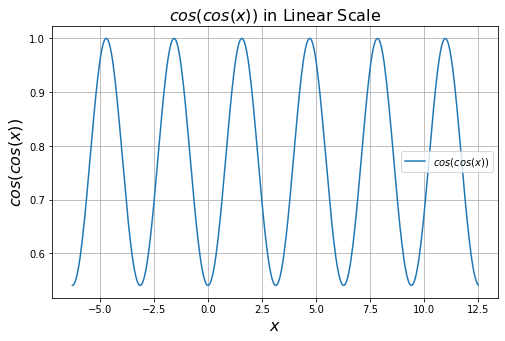

In [4]:
def plot_coscos(title, periodic_extension=False, fourier=False):
    plt.figure(figsize=(8, 5))
    plt.title(title, fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    plt.ylabel("$cos(cos(x))$", fontsize=16)
    plt.plot(x, coscos(x), label="$cos(cos(x))$")
    if periodic_extension or fourier:
        plt.plot(x, coscos(x % (2 * np.pi)), label="periodic extension")
    if fourier:
        plt.plot(x[200:600], np.dot(A, c[1]), 'go', label="by least squares")
    plt.legend()
    plt.grid()

plot_coscos("$cos(cos(x))$ in Linear Scale")

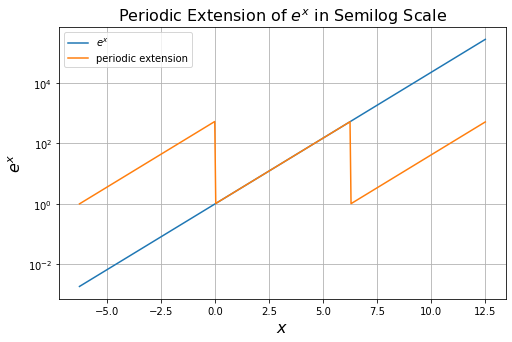

In [5]:
plot_exp("Periodic Extension of $e^x$ in Semilog Scale", periodic_extension=True)

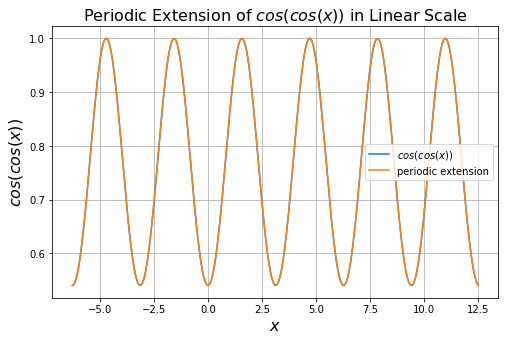

In [6]:
plot_coscos("Periodic Extension of $cos(cos(x))$ in Linear Scale", periodic_extension=True)

### 2. Evaluate Integrals

In [7]:
def u(x, k, f):  # f is either exp or coscos
    return f(x) * np.cos(k * x)

def v(x, k, f):  # f is either exp or coscos
    return f(x) * np.sin(k * x)

In [8]:
F = [exp, coscos]
a_0 = np.zeros((2))
a_n = np.zeros((2, 25))
b_n = np.zeros((2, 25))

for i in range(2):  # iterate over exp and coscos
    a_0[i] = quad(F[i], 0, 2 * np.pi)[0] / (2 * np.pi)

    for j in range(25):  # integration
        a_n[i, j] = quad(u, 0, 2 * np.pi, args=(j + 1, F[i]))[0] / np.pi
        b_n[i, j] = quad(v, 0, 2 * np.pi, args=(j + 1, F[i]))[0] / np.pi

### 3. Plot the Fourier Coefficients

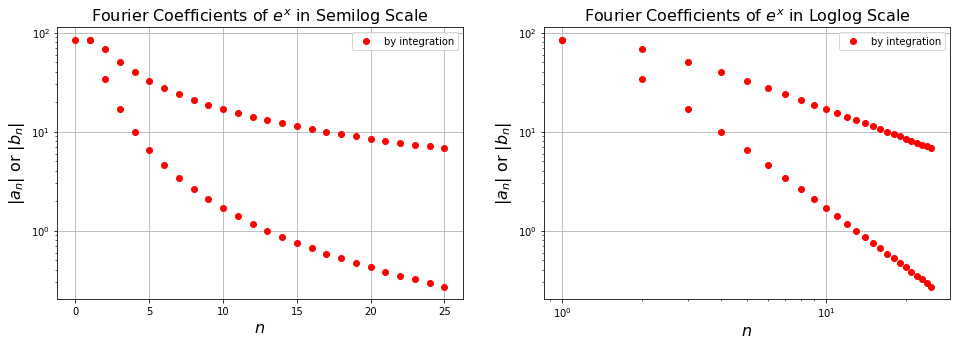

In [9]:
c_n = np.zeros((2, 51))  # c_n[0] and c_n[1] are the answer vectors for exp and coscos
c_n[:, 0] = a_0
c_n[:, 1::2] = a_n  # alternate elements starting at 1
c_n[:, 2::2] = b_n  # alternate elements starting at 2

def plot_coeffs(f, least_squares=False):
    f_i = 0 if f == "e^x" else 1
    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Fourier Coefficients of ${f}$ in Semilog Scale", fontsize=16)
    plt.xlabel("$n$", fontsize=16)
    plt.ylabel("$|a_n|$ or $|b_n|$", fontsize=16)
    plt.semilogy(0, np.abs(a_0[f_i]), 'ro', label="by integration")
    plt.semilogy(range(1, 26), np.abs(a_n[f_i]), 'ro')
    plt.semilogy(range(1, 26), np.abs(b_n[f_i]), 'ro')
    if least_squares:
        plt.semilogy(0, np.abs(c[f_i][0]), 'go', label="by least squares")
        plt.semilogy(range(1, 26), np.abs(c[f_i][1::2]), 'go')
        plt.semilogy(range(1, 26), np.abs(c[f_i][2::2]), 'go')
    plt.legend()
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title(f"Fourier Coefficients of ${f}$ in Loglog Scale", fontsize=16)
    plt.xlabel("$n$", fontsize=16)
    plt.ylabel("$|a_n|$ or $|b_n|$", fontsize=16)
    plt.loglog(0, np.abs(a_0[f_i]), 'ro', label="by integration")
    plt.loglog(range(1, 26), np.abs(a_n[f_i]), 'ro')
    plt.loglog(range(1, 26), np.abs(b_n[f_i]), 'ro')
    if least_squares:
        plt.loglog(0, np.abs(c[f_i][0]), 'go', label="by least squares")
        plt.loglog(range(1, 26), np.abs(c[f_i][1::2]), 'go')
        plt.loglog(range(1, 26), np.abs(c[f_i][2::2]), 'go')
    plt.legend()
    plt.grid()

plot_coeffs("e^x")

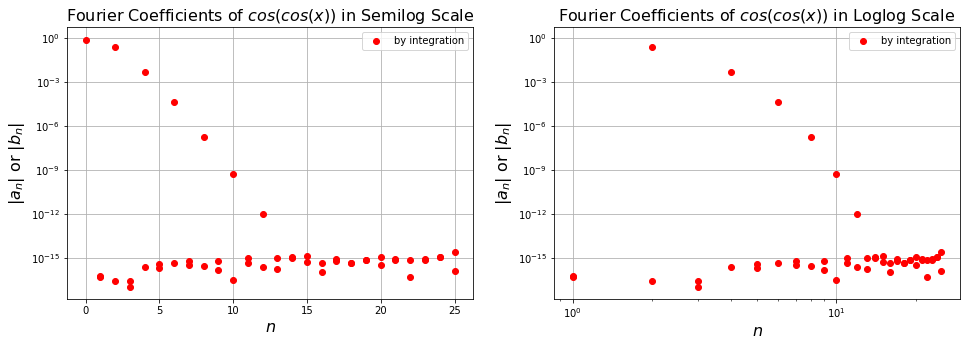

In [10]:
plot_coeffs("cos(cos(x))")

### 4. Least Squares

In [11]:
x = np.linspace(0, 2 * np.pi, 400, endpoint=False)
c = np.zeros((2, 51))  # c[0] and c[1] are the answer vectors

A = np.ones((400, 51))  # first column should be ones
for k in range(1, 26):
    A[:, 2 * k - 1] = np.cos(k * x)
    A[:, 2 * k] = np.sin(k * x)

for i in range(2):
    b = F[i](x)
    c[i] = lstsq(A, b)[0]

### 5. Plot the Best Fit Coefficients

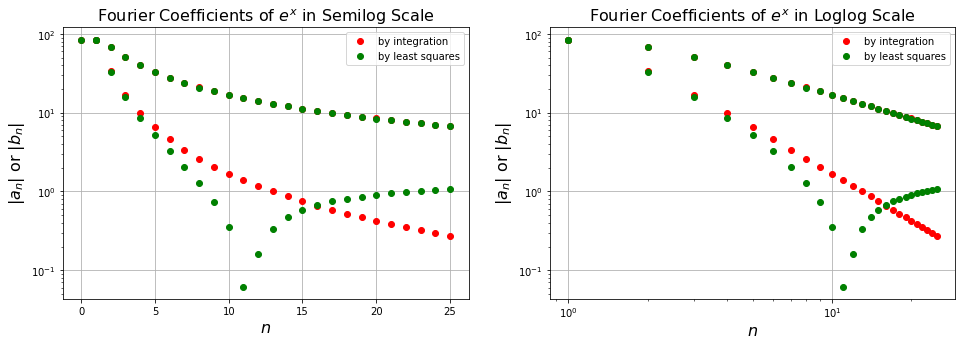

In [12]:
plot_coeffs("e^x", least_squares=True)

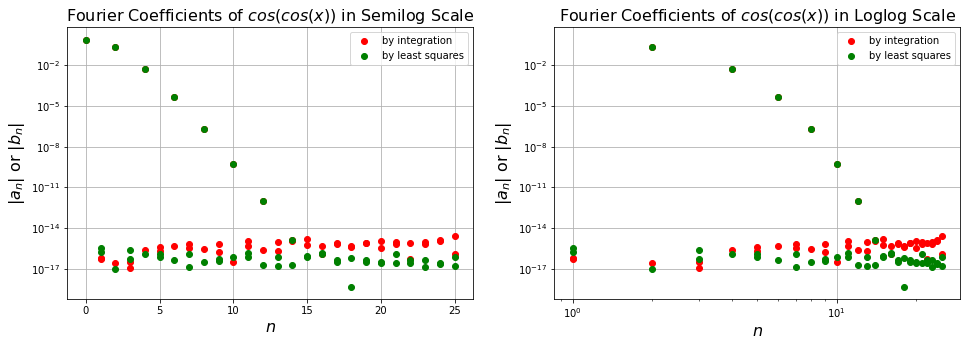

In [13]:
plot_coeffs("cos(cos(x))", least_squares=True)

### 6. Compare Least Squares and Direct Integration

In [14]:
print(f"The largest deviation of coefficients for     e^x     is: {np.max(np.abs(c[0] - c_n[0])):.5}")
print(f"The largest deviation of coefficients for cos(cos(x)) is: {np.max(np.abs(c[1] - c_n[1])):.5}")

The largest deviation of coefficients for     e^x     is: 1.3327
The largest deviation of coefficients for cos(cos(x)) is: 2.6684e-15


### 7. Plot the Fourier Approximations

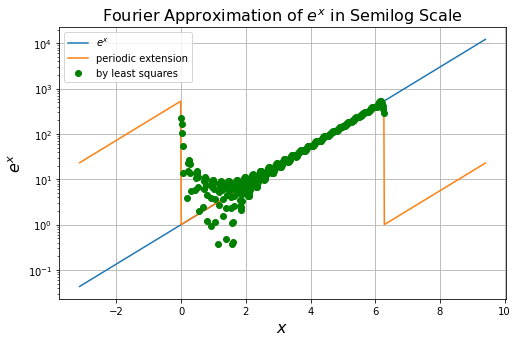

In [15]:
x = np.linspace(-np.pi, 3 * np.pi, 800, endpoint=False)

plot_exp("Fourier Approximation of $e^x$ in Semilog Scale", fourier=True)

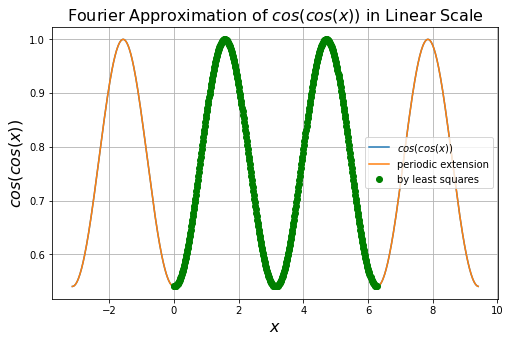

In [16]:
plot_coscos("Fourier Approximation of $cos(cos(x))$ in Linear Scale", fourier=True)